# Классификация на реальных данных

## Из методички

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score

Загрузим набор данных. Это датасет, собравший информацию о медицинских показателях более 700 пациентов, обследованных на предмет наличия сахарного диабета.

In [26]:
data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML2.2%20real%20classification/data/diabetes.csv")

In [27]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Пропусков в данных нет. Все данные в численных шкалах.

In [29]:
data.describe() # статистика по датасету (шкала измерения каждого признака)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [30]:
y = data.Outcome # целевая переменная
X = data.drop(["Outcome"], axis=1) # факторы

In [31]:
y.shape, X.shape

((768,), (768, 8))

In [32]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()

In [33]:
logistic.fit(X, y)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Процесс обучения завершился по условию достижения максимального количества итераций, а не по условию стабилизации функции ошибки.

In [34]:
print("Coefficients: \n", logistic.coef_[0])

Coefficients: 
 [ 1.17252323e-01  3.35996240e-02 -1.40874333e-02 -1.27055194e-03
 -1.24030932e-03  7.72025779e-02  1.41904101e+00  1.00355633e-02]


В линейных моделях коэффициенты показывают значимость соответствующих признаков.

In [35]:
_ = [print(k, v) for k, v in zip(X.columns, logistic.coef_[0])]

Pregnancies 0.11725232256061724
Glucose 0.03359962395485557
BloodPressure -0.014087433346880599
SkinThickness -0.0012705519414239344
Insulin -0.0012403093150474788
BMI 0.07720257786510536
DiabetesPedigreeFunction 1.419041006173723
Age 0.01003556334281655


Pregnancies - положительный коэффициент, увеличение кол-ва беременностей связано с увеличением развития диабета.

Glucose - более высокие уровни глюкозы = большая вероятность диабета.

BloodPressure - отрицательный коэффициент, более высокое давление снижает вероятность диабета.

SkinThickness - очень маленький отрицательный коэффициент, незначительное влияние толщины кожи на вероятность диабета.

Insulin - незначительное влияние уровня инсулина.

BMI - положительный коэффициент, более высокий индекс массы тела связан с повышенной вероятностью диабета.

DiabetesPedigreeFunction - самый высокий коэффициент, наличие наследственности оказывает наиболее сильное влияние на вероятность диабета.

Age - с увеличением возраста растет вероятность диабета.

In [36]:
print("Intercept: \n", logistic.intercept_)

Intercept: 
 [-7.70289515]


In [37]:
y_pred = logistic.predict(X)

Вектор предсказанных значений целевой переменной можно сравнить с реальными значениями.

In [38]:
_ = [print(a, b) for a, b in list(zip(y, y_pred))[:10]]

1 1
0 0
1 1
0 0
1 1
0 0
1 0
0 1
1 1
1 0


In [39]:
from sklearn import metrics
metrics.confusion_matrix(y, y_pred)

array([[447,  53],
       [114, 154]])

447 - кол-во объектов класса 0, которые модель правильно классифицировала (True Negatives).

53 - кол-во объектов класса 0, которые модель ошибочно классифицировала (False Positives).

114 - кол-во объектов класса 1, которые модель ошибочно классифицировала (False Negatives).

154 - кол-во объектов класса 1, которые модель правильно классифицировала (True Positives).

<Axes: >

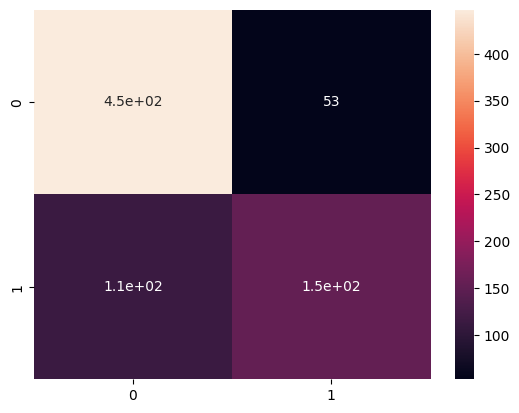

In [40]:
import seaborn as sns
sns.heatmap(metrics.confusion_matrix(y, y_pred), annot=True)

In [41]:
logistic.score(X, y) # показывает долю правильно распознанных объектов

0.7825520833333334

In [42]:
metrics.accuracy_score(y, y_pred)

0.7825520833333334

In [43]:
from sklearn.preprocessing import PolynomialFeatures
# позволяет преобразовать исходные признаки в их полиномиальные расширения (признаки высших степеней)

In [44]:
poly = PolynomialFeatures(2)
# исходные признаки в полиномиальные признаки второго порядка

In [45]:
poly = poly.fit_transform(X)
poly

array([[1.00000e+00, 6.00000e+00, 1.48000e+02, ..., 3.93129e-01,
        3.13500e+01, 2.50000e+03],
       [1.00000e+00, 1.00000e+00, 8.50000e+01, ..., 1.23201e-01,
        1.08810e+01, 9.61000e+02],
       [1.00000e+00, 8.00000e+00, 1.83000e+02, ..., 4.51584e-01,
        2.15040e+01, 1.02400e+03],
       ...,
       [1.00000e+00, 5.00000e+00, 1.21000e+02, ..., 6.00250e-02,
        7.35000e+00, 9.00000e+02],
       [1.00000e+00, 1.00000e+00, 1.26000e+02, ..., 1.21801e-01,
        1.64030e+01, 2.20900e+03],
       [1.00000e+00, 1.00000e+00, 9.30000e+01, ..., 9.92250e-02,
        7.24500e+00, 5.29000e+02]])

In [46]:
polynomial = LogisticRegression()
polynomial.fit(poly, y)
y_pred_poly = polynomial.predict(poly)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [47]:
# без полиномиальных признаков
linear = LogisticRegression()
linear.fit(X, y)
y_pred_linear = linear.predict(X)

acc_linear = accuracy_score(y, y_pred_linear)
f1_linear = f1_score(y, y_pred_linear)

acc_poly = accuracy_score(y, y_pred_poly)
f1_poly = f1_score(y, y_pred_poly)

print(f"Linear Model - Accuracy: {acc_linear:.2f}, F1-score: {f1_linear:.2f}")
print(f"Polynomial Model - Accuracy: {acc_poly:.2f}, F1-score: {f1_poly:.2f}")


Linear Model - Accuracy: 0.78, F1-score: 0.65
Polynomial Model - Accuracy: 0.72, F1-score: 0.58


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Задания для самостоятельного выполнения

*1. Изучите документацию sklearn, посвященную классу LogisticRegression. Какую еще информацию можно вывести для обученной модели? Попробуйте изменить аргументы при создании модели и посмотрите, как это влияет на качество предсказания.*

Атрибуты модели:

coef_ - коэффициенты модели, веса признаков для каждой категории

intercept_ - свободный член

n_iter_ - кол-во итераций для сходимости алгоритма

penalty - тип регуляризации (l2/l1/elasticnet)

max_iter_ - макс кол-во итераций

multi_class - метод многолкассовой классификации (ovr - one vs rest, multinomial)

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=2, n_informative=2,
                            n_redundant=0, n_classes=2, random_state=1)

# разделение данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# регуляризация L1
model_l1 = LogisticRegression(penalty='l1', solver='liblinear')
model_l1.fit(X_train, y_train)
y_pred_l1 = model_l1.predict(X_test)
print(f"Accuracy L1: {accuracy_score(y_test, y_pred_l1)}")

# регуляризация L2
model_l2 = LogisticRegression(penalty='l2')
model_l2.fit(X_train, y_train)
y_pred_l2 = model_l2.predict(X_test)
print(f"Accuracy L2: {accuracy_score(y_test, y_pred_l2)}")

# разные значения C
model_C_high = LogisticRegression(C=10)
model_C_high.fit(X_train, y_train)
y_pred_C_high = model_C_high.predict(X_test)
print(f"Accuracy C=10: {accuracy_score(y_test, y_pred_C_high)}")

model_C_low = LogisticRegression(C=0.01)
model_C_low.fit(X_train, y_train)
y_pred_C_low = model_C_low.predict(X_test)
print(f"Accuracy C=0.01: {accuracy_score(y_test, y_pred_C_low)}")


Accuracy L1: 0.86
Accuracy L2: 0.86
Accuracy C=10: 0.86
Accuracy C=0.01: 0.8566666666666667


Регуляризация (penalty) - одинаковая точность.

Коэффициент регуляризации С - меньшее С увеличивает регуляризацию, может привести к ухудшению точности на обучающих данных.

Алгоритм оптимизации (solver) - может влиять на скорость сходимости.

*2. Попробуйте применить к той же задаче другие модели классификации. Для каждой из них выведите матрицу классификации и оценку точности.*

Метод опорных векторов (SVM) - ищет гиперплоскость, разделяющую классы с максимальной шириной.



*   Без ядра - данные разделяются в исходном пространстве признаков с помощью линейной гиперплоскости (т.е. предполагается, что данные линейно разделимы).
*   С линейным ядром - также линейная гиперплоскость, но используется ядро для вычислений, которое позволяет эффективно работать с высокоразмерными данными, не вычисляя напрямую координаты в этих высоких измерениях.
*   С гауссовым ядром - разделяет данные, которые не могут быть разделены линейной гиперплоскостью. Преобразует данные в бесконечномерное пространство, где проводит гиперплоскость.
*   С полиномиальным ядром - преобразует данные в пространство более высоких степеней. Разделение с использованием полинома.






Метод ближайших соседей - определяет класс объекта на основе классов его ближайших соседей. Для этого вычисляется расстояние до других объектов, и объект присваивается классу, который чаще всего встречается среди ближайших соседей. Не требует явного обучения, работает напрямую с данными.

Многослойный перцептрон (MLP) - тип искусственной нейронной сети, которая состоит из нескольких слоев нейронов. Каждый нейрон в слое соединен с нейронами предыдущего и следующего слоя. MLP состоит из входного слоя, нескольких скрытых слоев и выходного слоя. Использует нелинейные активационные функции (например, ReLU, сигмоида).

Дерево решений - принимает решение о классе на основе последовательных вопросов, каждый из которых делит данные на подмножества. Каждый узел дерева - тест на атрибут (например, проверка значения признака), а каждое ребро - результат (например, больше/меньше). Склонны к переобучению, если дерево слишком глубокое.

Наивный байесовский классификатор - предсказывает класс объекта, основываясь на вероятностях (использует теорему Байеса). Он пытается вычислить вероятность того, что объект принадлежит к какому-то классу, основываясь на характеристиках этого объекта. Он предполагает, что все признаки независимы друг от друга.

Пассивно-агрессивный классфикатор - быстрый и эффективный процесс обучения. Модель не обновляется, если текущее предсказание было правильным (данные, которые уже классифицируются верно, модельне меняет). Если же предсказание ошибочное, модель делает агрессивное обновление (значительно корректирует свои параметры, чтобы лучше классифицировать прмиер).

Гребневый классификатор - основан на линейной регрессии, но с добавлением штрафа за слишком большие коэффициенты признаков (помогает избежать слишком сильного обучения на шумных данных (ошибки, искажения, случайные колебания)).

Случайный лес - множество деревьев решений. Каждый элемент в случайном лесе - это отдельное дерево решений, обученное на случайном подмножестве данных с использованием случайного подмножества признаков для каждого разделения.

Беггинг - использует несколько одинаковых моделей для повышения точности и устройчивости алгоритма. Идея - обучить несколько моделей на случайных подмножествах данных и затем объединить их прогнозы для получения итогового результата. В процессе беггинга данные для каждой модели выбираются случайным образом с возвращением. После того как модели модели обучены, их прогнозы объединяются (для классификации - путем голосования, для регрессии - усреднения).

In [49]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.linear_model import PassiveAggressiveClassifier, RidgeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# метод опорных векторов

# линейное ядро
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("SVM (linear kernel):")
print(confusion_matrix(y_test, y_pred_svm))
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.2f}\n")

# с гауссовым ядром
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)
y_pred_svm_rbf = svm_rbf.predict(X_test)
print("SVM (RBF kernel):")
print(confusion_matrix(y_test, y_pred_svm_rbf))
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm_rbf):.2f}\n")

# с полиномиальным ядром
svm_poly = SVC(kernel='poly')
svm_poly.fit(X_train, y_train)
y_pred_svm_poly = svm_poly.predict(X_test)
print("SVM (polynomial kernel):")
print(confusion_matrix(y_test, y_pred_svm_poly))
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm_poly):.2f}\n")


# метод ближайших соседей
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("KNN:")
print(confusion_matrix(y_test, y_pred_knn))
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.2f}\n")


# многослойный перцептрон
mlp = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)
print("MLP Classifier:")
print(confusion_matrix(y_test, y_pred_mlp))
print(f"Accuracy: {accuracy_score(y_test, y_pred_mlp):.2f}\n")

# дерево решений
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_test)
print("Decision Tree:")
print(confusion_matrix(y_test, y_pred_dt))
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.2f}\n")

# наивный байесовский классификатор
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
print("Naive Bayes:")
print(confusion_matrix(y_test, y_pred_nb))
print(f"Accuracy: {accuracy_score(y_test, y_pred_nb):.2f}\n")

# случайный лес
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)
print("Random Forest:")
print(confusion_matrix(y_test, y_pred_rf))
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.2f}\n")


# пассивно-агрессивный классификатор
pac = PassiveAggressiveClassifier()
pac.fit(X_train, y_train)
y_pred_pac = pac.predict(X_test)
print("Passive Aggressive Classifier:")
print(confusion_matrix(y_test, y_pred_pac))
print(f"Accuracy: {accuracy_score(y_test, y_pred_pac):.2f}\n")


# гребневый классификатор
ridge = RidgeClassifier()
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
print("Ridge Classifier:")
print(confusion_matrix(y_test, y_pred_ridge))
print(f"Accuracy: {accuracy_score(y_test, y_pred_ridge):.2f}\n")


# беггинг
bagging = BaggingClassifier()
bagging.fit(X_train, y_train)
y_pred_bagging = bagging.predict(X_test)
print("Bagging Classifier:")
print(confusion_matrix(y_test, y_pred_bagging))
print(f"Accuracy: {accuracy_score(y_test, y_pred_bagging):.2f}\n")


SVM (linear kernel):
[[80 15]
 [12 93]]
Accuracy: 0.86

SVM (RBF kernel):
[[80 15]
 [12 93]]
Accuracy: 0.86

SVM (polynomial kernel):
[[76 19]
 [10 95]]
Accuracy: 0.85

KNN:
[[81 14]
 [14 91]]
Accuracy: 0.86

MLP Classifier:
[[79 16]
 [11 94]]
Accuracy: 0.86

Decision Tree:
[[79 16]
 [18 87]]
Accuracy: 0.83

Naive Bayes:
[[79 16]
 [12 93]]
Accuracy: 0.86

Random Forest:
[[82 13]
 [11 94]]
Accuracy: 0.88

Passive Aggressive Classifier:
[[78 17]
 [15 90]]
Accuracy: 0.84

Ridge Classifier:
[[80 15]
 [12 93]]
Accuracy: 0.86

Bagging Classifier:
[[82 13]
 [19 86]]
Accuracy: 0.84



*3. Напишите функцию, которая автоматически обучает все перечисленные модели и для каждой выдает оценку точности.*

In [50]:
def evaluate_models(X, y):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    models = {
        'Logistic Regression': LogisticRegression(),
        'SVM (linear kernel)': SVC(kernel='linear'),
        'KNN': KNeighborsClassifier(),
        'MLP (Multilayer Perceptron)': MLPClassifier(),
        'Decision Tree': DecisionTreeClassifier(),
        'Naive Bayes': GaussianNB(),
        'Passive Aggressive': PassiveAggressiveClassifier(),
        'Ridge Classifier': RidgeClassifier(),
        'Random Forest': RandomForestClassifier(),
        'Bagging': BaggingClassifier()
    }

    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        print(f"Model: {model_name}")
        print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
        print("Confusion Matrix:")
        print(confusion_matrix(y_test, y_pred))
        print()

evaluate_models(X, y)


Model: Logistic Regression
Accuracy: 0.84
Confusion Matrix:
[[128  25]
 [ 24 123]]

Model: SVM (linear kernel)
Accuracy: 0.85
Confusion Matrix:
[[128  25]
 [ 21 126]]

Model: KNN
Accuracy: 0.87
Confusion Matrix:
[[133  20]
 [ 20 127]]

Model: MLP (Multilayer Perceptron)
Accuracy: 0.86
Confusion Matrix:
[[130  23]
 [ 19 128]]

Model: Decision Tree
Accuracy: 0.83
Confusion Matrix:
[[130  23]
 [ 29 118]]

Model: Naive Bayes
Accuracy: 0.85
Confusion Matrix:
[[127  26]
 [ 20 127]]

Model: Passive Aggressive
Accuracy: 0.84
Confusion Matrix:
[[122  31]
 [ 18 129]]

Model: Ridge Classifier
Accuracy: 0.84
Confusion Matrix:
[[127  26]
 [ 21 126]]

Model: Random Forest
Accuracy: 0.86
Confusion Matrix:
[[133  20]
 [ 23 124]]

Model: Bagging
Accuracy: 0.85
Confusion Matrix:
[[134  19]
 [ 27 120]]



*4. Повторите полностью анализ для другой задачи - распознавание вида ириса по параметрам растения (можно использовать метод sklearn.datasets.load_iris()).*

In [51]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target


def evaluate_models(X, y):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    models = {
        'Logistic Regression': LogisticRegression(max_iter=200),
        'SVM (linear kernel)': SVC(kernel='linear'),
        'SVM (no kernel)': SVC(kernel='linear'),  # это будет фактически SVM с линейным ядром
        'KNN': KNeighborsClassifier(),
        'MLP (Multilayer Perceptron)': MLPClassifier(max_iter=1000),
        'Decision Tree': DecisionTreeClassifier(),
        'Naive Bayes': GaussianNB(),
        'Passive Aggressive': PassiveAggressiveClassifier(),
        'Ridge Classifier': RidgeClassifier(),
        'Random Forest': RandomForestClassifier(),
        'Bagging': BaggingClassifier()
    }

    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        print(f"Model: {model_name}")
        print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
        print("Confusion Matrix:")
        print(confusion_matrix(y_test, y_pred))
        print("-" * 50)


evaluate_models(X, y)


Model: Logistic Regression
Accuracy: 1.00
Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
--------------------------------------------------
Model: SVM (linear kernel)
Accuracy: 1.00
Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
--------------------------------------------------
Model: SVM (no kernel)
Accuracy: 1.00
Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
--------------------------------------------------
Model: KNN
Accuracy: 1.00
Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
--------------------------------------------------
Model: MLP (Multilayer Perceptron)
Accuracy: 1.00
Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
--------------------------------------------------
Model: Decision Tree
Accuracy: 1.00
Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
--------------------------------------------------
Model: Naive Bayes
Accuracy: 0.98
Confusion Matrix:
[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]
-----------------------------------------